In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import decomposition, cluster, metrics, svm
from sklearn.cross_validation import train_test_split
from sklearn.manifold import Isomap
from sklearn.preprocessing import scale
from sklearn.grid_search import GridSearchCV

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
%matplotlib  inline

# 1. EXPLORE DATA

### digits is a dictioanry with text & arrays

In [3]:
digits = datasets.load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
digits_data = digits.data
digits_target = digits.target

In [6]:
print("data - {0}\ntarget - {1}".format(digits_data.shape, digits_target.shape))

data - (1797, 64)
target - (1797,)


### all 1797 DIGITS DATA are digits 0-9

In [7]:
number_digits = len(np.unique(digits.target))
number_digits

10

In [8]:
digits.images.shape

(1797, 8, 8)

### (1797, 8, 8) == (1797, 64)

In [9]:
print(np.all(digits.images.reshape((1797,64)) == digits.data))

True


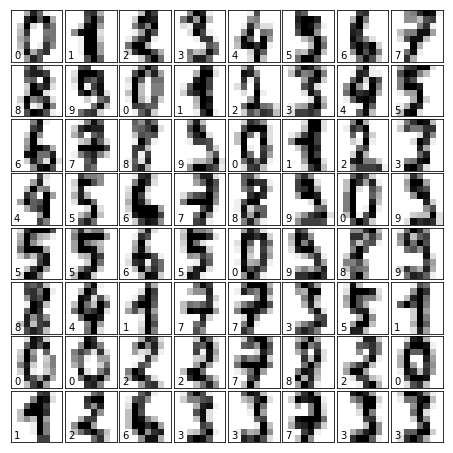

In [10]:
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


for i in range(64): # images
    
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))


plt.show()

### or zip targets with their images

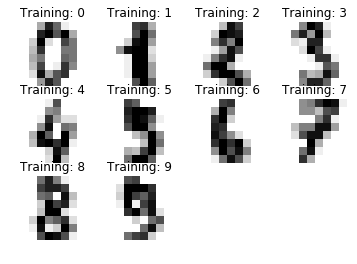

In [11]:
images_and_labels = list(zip(digits.images, digits.target))

# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:10]):
    
    # initialize a subplot of 3x4 at the i+1-th position
    plt.subplot(3,4, index + 1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots 
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Training: ' + str(label))

# Show the plot
plt.show()

In [12]:
len(images_and_labels[:8])

8

# 1a. Dimensionality Reduction

### 64 features is a lot to use so use PCA to find a linear combinatiion of 2 variables that contain the most information 
    > do regular PCA & randomized PCA

In [13]:
#randomized_pca = decomposition.PCA(n_components=2)
randomized_pca = decomposition.RandomizedPCA(n_components=2)

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = decomposition.PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
reduced_data_pca.shape

# Print out the data
print(reduced_data_rpca)
print(reduced_data_pca)

[[ -1.26174756  21.27611377]
 [  7.96752989 -20.74177638]
 [  7.03334654  -9.97730775]
 ..., 
 [ 10.80393411  -6.97897794]
 [ -4.87704404  12.41427013]
 [ -0.35641266   6.323361  ]]
[[ -1.25946704  21.27488765]
 [  7.95761162 -20.76869899]
 [  6.99192329  -9.95599162]
 ..., 
 [ 10.80128282  -6.96024429]
 [ -4.8720988   12.42393784]
 [ -0.34439042   6.36555537]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


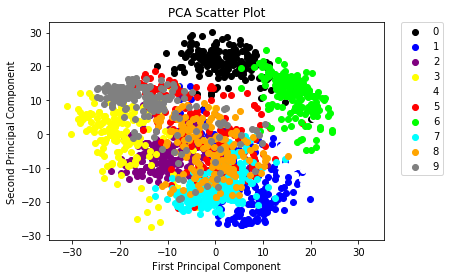

In [14]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
    
    
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")


# 2. k-means algorithm 

    > finds nearest cluster center for each data point and assigned data point closest to that cluster.  once data points are assigned to all clusters, clusters will be recomputed -- i.e. a new cluster emerges & this process is repeated & cluster membership SHOULD stabilize.  Initial set of clusters important

# 2a. Preprocessing data

    > DATA NORMALIZATION -- 
    > By scaling the data, you shift the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance)

In [15]:
data = scale(digits.data)

### 75% training 25% test

In [16]:
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

In [17]:
y_train.shape, y_test.shape

((1347,), (450,))

In [18]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [19]:
# Number of training features
n_samples, n_features = X_train.shape
print("Xsamples = {}\nxfeatures = {}\nytraining labels = {}".format(n_samples, n_features, len(np.unique(y_train))))

Xsamples = 1347
xfeatures = 64
ytraining labels = 10


### k- Means
    > n_clusters is the number of clusters to form and number of centroids to generate.  A cluster centroid is the middle of a cluster <<-- possible disadvantage -- initial # of clusters you generate can centers can have an effect on clusters that are eventually found in algorithm.  You deal with this by trying multiple runs * selecting the set of clusters with the minimum sum of squared errors (SSE) -- want to minimize the distance of each point int he cluster to the MEAN OR THE CENTROID of that cluster
    
    > dont be silly and insert test labels into model

In [20]:
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

# Fit the training data to the model
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

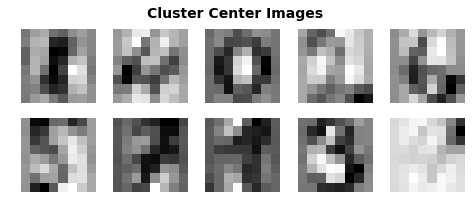

In [21]:
# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

In [22]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

# Study the shape of the cluster centers
clf.cluster_centers_.shape

[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]


(10, 64)

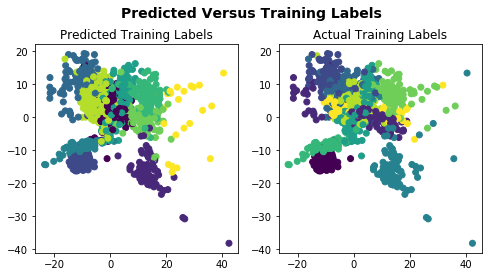

In [23]:
# Create an isomap and fit the `digits` data to it
# iso map is a non-linear reduction method
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

### evaluate k-means

In [24]:
# Print out the confusion matrix with `confusion_matrix()`
print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


### ascertain more about quality of cluster by applying 'cluster quality metrics' -- judge goodness of fit of cluster labels to correct labels

    > The homogeneity score tells you to what extent all of the clusters contain only data points which are members of a single class.
    
    
    > The completeness score measures the extent to which all of the data points that are members of a given class are also elements of the same cluster.
    
    > The V-measure score is the harmonic mean between homogeneity and completeness
    
    
    > The adjusted Rand score measures the similarity between two clusterings and considers all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings
      -----> ARI measure seems to indicate that not all data points in a given cluster are
             similar and the completeness score tells you that there are definitely data 
             points that weren’t put in the right cluster
             
    
    > The Adjusted Mutual Info (AMI) score is used to compare clusters. It measures the similarity between the data points that are in the clusterings, accounting for chance groupings and takes a maximum value of 1 when clusterings are equivalent
    
    
    > The silhouette score measures how similar an object is to its own cluster compared to other clusters. The silhouette scores ranges from -1 to 1, where a higher value indicates that the object is better matched to its own cluster and worse mached to neighboring clusters. If many points have a high value, the clusteirng configuration is good.
       ----> silhouette score is close to 0, which indicates that the sample is on or very
             close to the decision boundary between two neighboring clusters.

In [25]:
print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      metrics.homogeneity_score(y_test, y_pred),
      metrics.completeness_score(y_test, y_pred),
      metrics.v_measure_score(y_test, y_pred),
      metrics.adjusted_rand_score(y_test, y_pred),
      metrics.adjusted_mutual_info_score(y_test, y_pred),
      metrics.silhouette_score(X_test, y_pred, metric='euclidean')))

inertia    homo   compl  v-meas     ARI AMI  silhouette
54276   0.688   0.733   0.710   0.567   0.674    0.146


### k-means isnt that great... so try Support Vector Machines

In [26]:
# Split the data into training and test sets 
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### C is penalty parameter of error term (kernel & gamma?) 

In [27]:
# Split the `digits` data into two equal sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=0)

# Import GridSearchCV


# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(X_train, y_train)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

Best score for training data: 0.9844097995545658
Best `C`: 10
Best kernel: rbf
Best `gamma`: 0.001


In [28]:
# Apply the classifier to the test data, and view the accuracy score
clf.score(X_test, y_test)  

# Train and score a new classifier with the grid search parameters
svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test)

0.99110122358175756

In [29]:
# Predict the label of `X_test`
print(svc_model.predict(X_test))

# Print `y_test` to check the results
print(y_test)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 2 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 5 3 6 2 1 6 2
 1 7 5 5 1 9 2 8 9 7 2 1 4 9 3 2 6 2 5 9 6 5 8 2 0 7 8 0 5 8 4 1 8 6 4 3 4
 2 0 4 5 8 3 3 1 8 3 4 5 

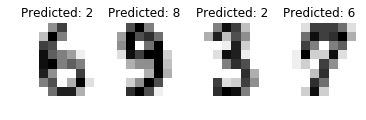

In [30]:


# Assign the predicted values to `predicted`
predicted = svc_model.predict(X_test)

# Zip together the `images_test` and `predicted` values in `images_and_predictions`
images_and_predictions = list(zip(images_test, predicted))

# For the first 4 elements in `images_and_predictions`
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # Initialize subplots in a grid of 1 by 4 at positions i+1
    plt.subplot(1, 4, index + 1)
    # Don't show axes
    plt.axis('off')
    # Display images in all subplots in the grid
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # Add a title to the plot
    plt.title('Predicted: ' + str(prediction))

# Show the plot
plt.show()

In [31]:
# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        89
          1       0.99      1.00      0.99        90
          2       0.99      1.00      0.99        92
          3       0.99      0.97      0.98        93
          4       1.00      0.99      0.99        76
          5       0.98      1.00      0.99       108
          6       1.00      1.00      1.00        89
          7       1.00      1.00      1.00        78
          8       1.00      0.99      0.99        92
          9       0.99      0.99      0.99        92

avg / total       0.99      0.99      0.99       899

[[ 89   0   0   0   0   0   0   0   0   0]
 [  0  90   0   0   0   0   0   0   0   0]
 [  0   0  92   0   0   0   0   0   0   0]
 [  0   0   1  90   0   1   0   0   0   1]
 [  0   1   0   0  75   0   0   0   0   0]
 [  0   0   0   0   0 108   0   0   0   0]
 [  0   0   0   0   0   0  89   0   0   0]
 [  0   0   0   0   0   0   0  78   0   0]
 [  0   0   0   0

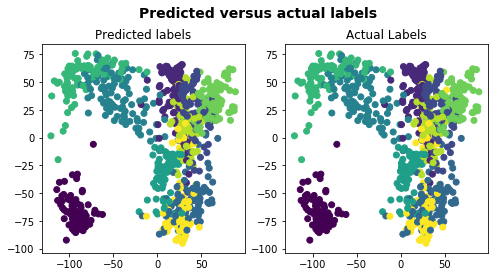

In [32]:
# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
predicted = svc_model.predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust the layout
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=predicted)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Labels')


# Add title
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# Show the plot
plt.show()